In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc

from scipy.stats import skew,kurtosis
import datetime

In [2]:
%matplotlib inline
# to view all columns
pd.set_option('display.max_columns',500)
plt.style.use('seaborn')

In [3]:
def summary_object(arg_df):
    
    object_list=[]
    category_list=[]
    bool_list=[]
    unilabel_list=[]
    missing_list=[]
    
    for c in arg_df.columns:
        if arg_df[c].dtypes==object:
            object_list.append(c)
        elif str(arg_df[c].dtypes)=='category':
            category_list.append(c)
        elif arg_df[c].dtypes==bool:
            bool_list.append(c)
    if len(object_list)+len(category_list)+len(bool_list)>0:    
        index_list=['Count','Unique','Missing (%)','Top','Top (%)','Bottom','Bottom (%)']
        df_summary=pd.DataFrame(data=np.zeros((len(index_list),len(object_list))),index=index_list,columns=object_list)

        for col in object_list+category_list+bool_list:
            vc=arg_df[col].value_counts().reset_index()
            df_summary.loc['Count',col]=(arg_df[col].count())
            df_summary.loc['Unique',col]=len(arg_df[col].unique())
            df_summary.loc['Missing (%)',col]=arg_df[col].isna().mean()*100
            df_summary.loc['Top',col]=vc.iloc[0,0]
            df_summary.loc['Top (%)',col]=vc.iloc[0,1]/len(arg_df)*100
            if len(arg_df[col].unique())>1:
                df_summary.loc['Bottom',col]=vc.iloc[-1,0]
                df_summary.loc['Bottom (%)',col]=vc.iloc[-1,1]/len(arg_df)*100
            else:
                unilabel_list.append(col)
            if df_summary.loc['Missing (%)',col]==100:
                missing_list.append(col)
                
        df_summary=df_summary.T.sort_values(['Missing (%)','Unique'],ascending=False)
        df_summary=df_summary[(df_summary['Unique']>1) & (df_summary['Missing (%)']!=100)]
        df_summary.reset_index(inplace=True)
        df_summary.index=df_summary.index+1
        df_summary.columns=['Attribute']+index_list
        
        print('SUMMARY OF {} NON-NUMERICAL ATTRIBUTES:\n'.format(
            len(object_list)+len(category_list)+len(bool_list)))
        if len(object_list)>0:
            print('{} Object Columns'.format(len(object_list)))
        if len(category_list)>0:
            print('{} Categorical Columns'.format(len(category_list)))
        if len(bool_list)>0:
            print('{} Bool Columns'.format(len(bool_list)))
        if len(unilabel_list)>0:
            print('\n{} Columns with Single Label : \n{}'.format(len(unilabel_list),unilabel_list))
        if len(missing_list)>0:
            print('\n{} Empty Columns: \n{}'.format(len(missing_list),missing_list))   
            
        del arg_df,object_list,vc,index_list,unilabel_list,missing_list
        gc.collect()
        return df_summary
    else:
        print('No Non-Numerical Attributes')
        
def summary_numerical(arg_df):

    target_list=[]
    missing_list=[]
    zero_skew_list=[]
    
    for c in arg_df.columns:
        datatype=arg_df[c].dtypes
        if datatype != object and datatype != bool and str(datatype) != 'category':
            target_list.append(c)
    if len(target_list)>0:
        from scipy.stats import skew,kurtosis
        
        index_list=['Count','Missing (%)','Mean','Median','Min','Max','Skewness','Kurtosis']
        df_summary=pd.DataFrame(data=np.zeros((len(index_list),len(target_list))),
                                index=index_list,columns=target_list)
        for col in target_list:
            df_summary.loc['Count',col]=arg_df[col].count()
            df_summary.loc['Missing (%)',col]=arg_df[col].isna().mean()*100
            if df_summary.loc['Missing (%)',col]!=100:
                df_summary.loc['Mean',col]=arg_df[col].mean()
                df_summary.loc['Median',col]=arg_df[col].median()
                df_summary.loc['Min',col]=arg_df[col].min()
                df_summary.loc['Max',col]=arg_df[col].max()
                df_summary.loc['Skewness',col]=skew(arg_df[col])
                if df_summary.loc['Skewness',col]==0:
                    zero_skew_list.append(col)
                df_summary.loc['Kurtosis',col]=kurtosis(arg_df[col])
            else:
                missing_list.append(col)
                
        df_summary=df_summary.T.sort_values(['Missing (%)','Skewness'],ascending=False)
        df_summary=df_summary[(df_summary['Skewness']!=0) & (df_summary['Missing (%)']!=100)]
        df_summary.reset_index(inplace=True)
        df_summary.index=df_summary.index+1
        df_summary.columns=['Attribute']+index_list
        
        print('SUMMARY OF {} NUMERICAL ATTRIBUTES:'.format(len(target_list)))
        if len(zero_skew_list)>0:
            print('\n{} Columns with Single Value: \n{}'.format(len(zero_skew_list),zero_skew_list))
        if len(missing_list)>0:
            print('\n{} Empty Columns: \n{}'.format(len(missing_list),missing_list))
        del arg_df,target_list,index_list
        gc.collect()

        return df_summary
    else:
        print('No Numerical Attributes')

In [215]:
def extract_room_row(arg_df,col_position):
    '''To return unique Room-Row from standard Room-Row-Column-Height position data'''
    roomrow=[]
    roomrow=arg_df[col_position].apply(lambda x :x.split('-')[0]+'-'+x.split('-')[1] if '-' in x else x)
    roomrow=roomrow.unique().tolist()
    roomrow=pd.DataFrame(extrc_row,columns=['Unique_Row']).sort_values(by='Unique_Row')
    return roomrow['Unique_Row'].values

In [4]:
#filepath_1='C:/Users/Nan/Documents/GitHub_Data/merge.csv'
filepath_2='C:/Users/Nan/Documents/GitHub_Data/merge_dispatch.csv'
#filename_1=filepath_1.rstrip('.csv')
filename_2=filepath_2.rstrip('.csv')
#merge=pd.read_csv(filepath_1)
merge_dispatch=pd.read_csv(filepath_2)

C:\Users\Nan\AppData\Local\conda\conda\envs\env\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (5,10,16,33,54) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
sns.set()

Text(0.5, 0, 'Quantity of Order Number')

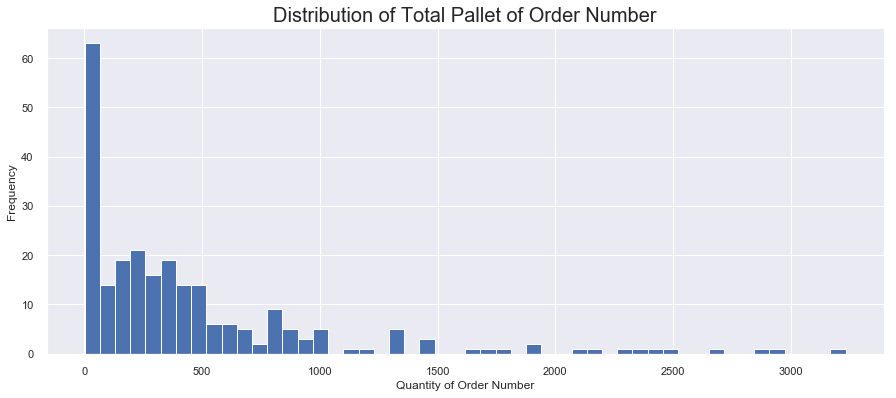

In [6]:
plt.figure(figsize=(15,6))
ax=merge_dispatch.groupby('Order Number')['Pallet Number'].count().plot(kind='hist',bins=50)
plt.title('Distribution of Total Pallet of Order Number',fontsize=20)
ax.set_xlabel('Quantity of Order Number',fontsize=12)

In [7]:
merge_dispatch['Transaction Date Time']=pd.to_datetime(merge_dispatch['Transaction Date Time'],format='%Y-%m-%d %H:%M:%S')

In [8]:
merge_dispatch.set_index(keys='Transaction Date Time',inplace=True)

In [9]:
merge_dispatch.groupby('Pallet Number')['New Value'].last().value_counts().head()

UNKNOWN    3881
CONTR      2689
CHRTR       348
LO1         189
LO2          19
Name: New Value, dtype: int64

In [10]:
merge_dispatch[['Transaction Date','Pallet Number']].duplicated().value_counts()

False    113853
dtype: int64

In [11]:
#pd.pivot_table(data=merge_dispatch,index='Transaction Date',
#               columns='Pallet Number',values='New Value',aggfunc='max',fill_value=)

In [12]:
merge_dispatch['Location Mission Request Destination_x'].value_counts(dropna=False)

na       62287
SPQI     16511
FW       14581
CONTR    13561
CHRTR     4781
RPK       1583
DA1        305
CSOF       120
DA3        120
LAB          4
Name: Location Mission Request Destination_x, dtype: int64

In [13]:
summary_object(merge_dispatch)

SUMMARY OF 51 NON-NUMERICAL ATTRIBUTES:

48 Object Columns
3 Bool Columns


Attribute   Count  Unique Missing (%)  \
1                         Transaction Date  113853  110481           0   
2                           Previous Value  113853   14502           0   
3                                New Value  113853   12302           0   
4                             Loadout Date  113853     400           0   
5                         Container Number  113853     327           0   
6                                Container  113853     321           0   
7                          Material Number  113853     315           0   
8                                     Room  113853     102           0   
9                                Pack Date  113853      83           0   
10                               Pack Type  113853      62           0   
11                                Username  113853      59           0   
12                          Pack Type Code  113853      56           0   
13                   Destination Port Code  113853      53           0   
14               Location Request Number_y  113853      45           0   
15                           Ok Until Date  113853      34           0   
16                              Shift_Date  113853      31           0   
17                     Location Row Code_x  113853      30           0   
18                     Location Row Code_y  113853      27           0   
19                   Trucking Company Code  113853      24           0   
20                    Location Room Code_x  113853      22           0   
21                               Pack Make  113853      22           0   
22                    Location Room Code_y  113853      22           0   
23                         Fruit Size Code  113853      21           0   
24                    Purchase Pool Code_x  113853      19           0   
25                    Purchase Pool Code_y  113853      19           0   
26                       Location Column_x  113853      14           0   
27                       Location Column_y  113853      14           0   
28  Location Mission Request Destination_x  113853      10           0   
29                Labelling Indicator Code  113853       9           0   
30                     Customer Label Code  113853       7           0   
31                       Location Height_x  113853       7           0   
32                                Marketer  113853       7           0   
33                           Protocol Code  113853       6           0   
34                          Packhouse Code  113853       5           0   
35             Stacking Configuration Code  113853       5           0   
36                         Dry Matter Code  113853       4           0   
37             Storing Characteristic Code  113853       4           0   
38            Trial Packing Indicator Code  113853       4           0   
39                            Variety Code  113853       4           0   
40       Quality Inspection Indicator Code  113853       3           0   
41                     Storage Method Code  113853       3           0   
42                       Location Height_y  113853       3           0   
43  Location Mission Request Destination_y  113853       3           0   
44                          Growing Method  113853       2           0   
45                    Japan Sub Brand Code  113853       2           0   
46                     Pack Indicator Code  113853       2           0   
47                         Pack Label Code  113853       2           0   
48               Transaction Sub Type Code  113853       2           0   
49                               Day_Shift  113853       2           0   
50                              DOI_Number  113853       2           0   
51                             Pallet Note  113853       2           0   

                       Top     Top (%)                  Bottom   Bottom (%)  
1    21/07/2019 9:25:35 AM  0.00439163   26/07/2019 1:05:41 AM  0.000878326  
2                  UNKNOWN  

In [14]:
summary_numerical(merge_dispatch)

SUMMARY OF 23 NUMERICAL ATTRIBUTES:

1 Columns with Single Value: 
['Pallet Rework Count']


Attribute     Count  Missing (%)          Mean  \
1               Pallet Number  113853.0          0.0  5.853802e+07   
2            Loadout Priority  113853.0          0.0  9.451828e+00   
3              Fruit Per Pack  113853.0          0.0  5.270343e+01   
4           Order Line Number  113853.0          0.0  4.977410e+01   
5                 Pack Code_x  113853.0          0.0  1.783364e+04   
6                 Pack Code_y  113853.0          0.0  1.884852e+04   
7           Ok_Until_Date_day  113853.0          0.0  9.263041e+00   
8               Pack_Date_day  113853.0          0.0 -6.996098e+01   
9                       Fruit  113853.0          0.0  7.943303e+03   
10               Packed Fruit  113853.0          0.0  7.731533e+03   
11  Location Request Number_x  113853.0          0.0  7.125295e+02   
12       Load_Start_Date_hour  113853.0          0.0 -2.245799e+01   
13                 Shift_Hour  113853.0          0.0  1.244935e+01   
14                      Packs  113853.0          0.0  1.765531e+02   
15         Tkl_Email_Date_day  113853.0          0.0 -2.630594e+00   
16                      Trays  113853.0          0.0  2.601614e+02   
17         Shipment Type Code  113853.0          0.0  1.236603e+01   
18         Last_Spqi_Date_day  113853.0          0.0 -5.713297e+00   
19            Envelope Number  113853.0          0.0  1.988691e+05   
20            Repack_Date_day  113853.0          0.0 -6.269927e-01   
21                 Plant Code  113853.0          0.0  1.101495e+03   
22               Order Number  113853.0          0.0  5.249943e+06   

        Median         Min           Max   Skewness    Kurtosis  
1   57436345.0  53184912.0  9.002244e+07   8.133443   86.577272  
2          6.0         1.0  5.000000e+01   2.657860    5.261069  
3         44.0        18.0  4.470000e+02   2.542683   20.018444  
4         30.0        10.0  4.000000e+02   2.094299    5.183016  
5      10307.0         0.0  7.633200e+04   1.880610    3.075863  
6      10308.0         0.0  7.633200e+04   1.801696    2.501526  
7         10.0        -2.0  4.600000e+01   1.055051    7.495779  
8        -76.0      -116.0 -1.000000e+00   0.989019    0.159244  
9       7680.0        50.0  1.430000e+04   0.589186    0.853364  
10      7656.0         0.0  2.035500e+04   0.423086    1.531169  
11         0.0         0.0  1.935000e+03   0.249061   -1.859203  
12       -17.0      -397.0  8.800000e+01   0.183757    5.676545  
13        12.0         0.0  2.300000e+01  -0.096431   -0.864075  
14       170.0         2.0  2.560000e+02  -0.108314   -1.143579  
15        -3.0        -9.0  0.000000e+00  -0.430141   -0.365917  
16       256.0         2.0  3.404762e+02  -0.569838    3.282710  
17        18.0         1.0  1.800000e+01  -0.648848   -1.507874  
18        -6.0       -66.0  0.000000e+00  -2.279139   12.181851  
19    199141.0    193001.0  1.993310e+05  -3.775463   20.583066  
20         0.0       -38.0  0.000000e+00  -6.007323   58.114791  
21      1103.0      1000.0  1.103000e+03  -8.089259   63.436106  
22   5311401.0     89878.0  5.353901e+06 -11.477649  139.408617

In [15]:
merge_dispatch['Pallet Number'].sample(4)

Transaction Date Time
2019-07-22 23:18:51    57417832
2019-07-22 10:24:18    57391361
2019-07-02 11:36:14    57383014
2019-07-16 13:56:21    57430480
Name: Pallet Number, dtype: int64

In [16]:
merge_dispatch.groupby(['Order Number','Pallet Number'])['Location Mission Request Destination_x'].count()

Order Number  Pallet Number
89878         90012611         12
              90021323          3
89880         90015919          1
              90021309          7
              90021316          2
              90021347          1
              90021354          2
              90021385          2
              90021408          2
              90021439          2
              90021446          2
89886         90011317         12
89896         90020586          2
              90020920         20
              90021378          2
              90021422          4
89902         90020203          2
              90021330          4
              90021415          4
89913         90018323          2
              90021262          8
89924         90019863          2
89930         90020593          3
              90020753          8
89931         90019757          1
              90021521          2
              90021538          6
              90021569          3
              900215

In [17]:
merge_dispatch[merge_dispatch['Pallet Number']==59717008][['Location Mission Request Destination_x','Previous Value','New Value','Loadout Date','Location Room Code_y']]

Location Mission Request Destination_x Previous Value  \
Transaction Date Time                                                         
2019-07-01 00:00:10                                       na     Q02-03-3-1   
2019-07-01 00:00:44                                       na     Q02-03-4-1   
2019-07-03 22:41:27                                       na     Q02-16-6-2   
2019-07-06 19:53:50                                       na     Q02-15-6-2   
2019-07-06 19:54:42                                       na     Q02-15-6-1   
2019-07-06 19:54:49                                       na    Q02-13-10-1   
2019-07-06 22:57:10                                       na    Q02-13-10-2   
2019-07-11 01:31:31                                       na     Q02-07-7-1   
2019-07-13 21:20:13                                    CHRTR     Q02-05-5-1   
2019-07-13 21:20:17                                    CHRTR        UNKNOWN   
2019-07-15 12:27:30                                    CHRTR     Q27-04-7-1   
2019-07-15 12:28:19                                    CHRTR        UNKNOWN   
2019-07-15 13:19:31                                       na          CHRTR   

                         New Value         Loadout Date Location Room Code_y  
Transaction Date Time                                                         
2019-07-01 00:00:10     Q02-03-4-1  2019-07-15 13:45:00              UNKNOWN  
2019-07-01 00:00:44     Q02-16-6-2  2019-07-15 13:45:00              UNKNOWN  
2019-07-03 22:41:27     Q02-15-6-2  2019-07-15 13:45:00              UNKNOWN  
2019-07-06 19:53:50     Q02-15-6-1  2019-07-15 13:45:00              UNKNOWN  
2019-07-06 19:54:42    Q02-13-10-1  2019-07-15 13:45:00              UNKNOWN  
2019-07-06 19:54:49    Q02-13-10-2  2019-07-15 13:45:00              UNKNOWN  
2019-07-06 22:57:10     Q02-07-7-1  2019-07-15 13:45:00              UNKNOWN  
2019-07-11 01:31:31     Q02-05-5-1  2019-07-15 13:45:00              UNKNOWN  
2019-07-13 21:20:13        UNKNOWN  2019-07-15 13:45:00              UNKNOWN  
2019-07-13 21:20:17     Q27-04-7-1  2019-07-15 13:45:00              UNKNOWN  
2019-07-15 12:27:30        UNKNOWN  2019-07-15 13:45:00              UNKNOWN  
2019-07-15 12:28:19          CHRTR  2019-07-15 13:45:00              UNKNOWN  
2019-07-15 13:19:31        UNKNOWN  2019-07-15 13:45:00              UNKNOWN

In [18]:
merge_dispatch[merge_dispatch['Pallet Number']==59756595][['Location Mission Request Destination_x','Previous Value','New Value','Loadout Date','Location Room Code_y','Container','Envelope Number']]

Location Mission Request Destination_x Previous Value  \
Transaction Date Time                                                         
2019-07-23 09:19:50                                       na        UNKNOWN   
2019-07-23 09:21:12                                       na        UNKNOWN   
2019-07-23 23:33:11                                       na     Q06-21-9-2   
2019-07-23 23:33:48                                       na     Q06-21-9-1   
2019-07-23 23:34:01                                       na     Q06-19-9-1   
2019-07-23 23:34:03                                       na     Q06-20-9-1   
2019-07-23 23:38:45                                       na     Q06-19-9-1   
2019-07-24 04:14:51                                       na    Q06-07-11-1   
2019-07-24 15:59:01                                       na     Q06-21-4-1   
2019-07-24 17:07:46                                       na     Q06-20-9-1   
2019-07-25 14:48:56                                       na    Q06-21-12-1   
2019-07-25 15:00:30                                       na     Q06-23-7-2   
2019-07-25 15:00:53                                       na     Q06-23-7-1   
2019-07-25 22:15:56                                       na    Q06-21-11-2   
2019-07-25 22:16:47                                       na    Q06-21-11-1   
2019-07-26 19:35:04                                    CONTR     Q06-24-4-2   
2019-07-26 20:44:48                                    CONTR    Q06-06-10-1   
2019-07-30 07:23:31                                    CONTR     Q06-21-3-2   
2019-07-30 07:24:06                                    CONTR     Q06-21-5-2   

                         New Value         Loadout Date Location Room Code_y  \
Transaction Date Time                                                          
2019-07-23 09:19:50        UNKNOWN  2019-07-30 11:45:00                CONTR   
2019-07-23 09:21:12     Q06-21-9-2  2019-07-30 11:45:00                CONTR   
2019-07-23 23:33:11     Q06-21-9-1  2019-07-30 11:45:00                CONTR   
2019-07-23 23:33:48     Q06-19-9-1  2019-07-30 11:45:00                CONTR   
2019-07-23 23:34:01     Q06-20-9-1  2019-07-30 11:45:00                CONTR   
2019-07-23 23:34:03     Q06-19-9-1  2019-07-30 11:45:00                CONTR   
2019-07-23 23:38:45    Q06-07-11-1  2019-07-30 11:45:00                CONTR   
2019-07-24 04:14:51     Q06-21-4-1  2019-07-30 11:45:00                CONTR   
2019-07-24 15:59:01     Q06-20-9-1  2019-07-30 11:45:00                CONTR   
2019-07-24 17:07:46    Q06-21-12-1  2019-07-30 11:45:00                CONTR   
2019-07-25 14:48:56     Q06-23-7-2  2019-07-30 11:45:00                CONTR   
2019-07-25 15:00:30     Q06-23-7-1  2019-07-30 11:45:00                CONTR   
2019-07-25 15:00:53    Q06-21-11-2  2019-07-30 11:45:00                CONTR   
2019-07-25 22:15:56    Q06-21-11-1  2019-07-30 11:45:00                CONTR   
2019-07-25 22:16:47     Q06-24-4-2  2019-07-30 11:45:00                CONTR   
2019-07-26 19:35:04    Q06-06-10-1  2019-07-30 11:45:00                CONTR   
2019-07-26 20:44:48     Q06-21-3-2  2019-07-30 11:45:00                CONTR   
2019-07-30 07:23:31     Q06-21-5-2  2019-07-30 11:45:00                CONTR   
2019-07-30 07:24:06          CONTR  2019-07-30 11:45:00                CONTR   

                      Container  Envelope Number  
Transaction Date Time                             
2019-07-23 09:19:50      8548.0           199224  
2019-07-23 09:21:12      8548.0           199224  
2019-07-23 23:33:11      8548.0           199224  
2019-07-23 23:33:48      8548.0           199224  
2019-07-23 23:34:01      8548.0           199224  
2019-07-23 23:34:03      8548.0           199224  
2019-07-23 23:38:45      8548.0           199224  
2019-07-24 04:14:51      8548.0           199224  
2019-07-24 15:59:01      8548.0           199224  
2019-07-24 17:07:46      8548.0           199224  
2019-07-25 14:48:56      8548.0           199224  
2019-07-25 15:00:3

In [19]:
merge_dispatch[merge_dispatch['Container']==8548.0]

Empty DataFrame
Columns: [Customer Label Code, Dry Matter Code, Fruit, Fruit Per Pack, Fruit Size Code, Growing Method, Japan Sub Brand Code, Labelling Indicator Code, Location Column_x, Location Height_x, Location Room Code_x, Location Row Code_x, Location Request Number_x, Location Mission Request Destination_x, Marketer, Material Number, New Value, Ok Until Date, Pack Code_x, Pack Date, Packed Fruit, Packhouse Code, Pack Indicator Code, Pack Label Code, Pack Make, Packs, Pack Type, Pallet Number, Pallet Rework Count, Plant Code, Previous Value, Protocol Code, Purchase Pool Code_x, Quality Inspection Indicator Code, Room, Storage Method Code, Storing Characteristic Code, Transaction Date, Transaction Sub Type Code, Trays, Trial Packing Indicator Code, Username, Variety Code, Day_Shift, Shift_Hour, Shift_Date, DOI_Number, Loadout Date, Location Room Code_y, Location Row Code_y, Location Column_y, Location Height_y, Loadout Priority, Purchase Pool Code_y, Pack Code_y, Pack Type Code, Stacking Configuration Code, Order Number, Order Line Number, Envelope Number, Container, Container Number, Shipment Type Code, Destination Port Code, Trucking Company Code, Location Request Number_y, Location Mission Request Destination_y, Pallet Note, Repack_Date_day, Last_Spqi_Date_day, Pack_Date_day, Ok_Until_Date_day, Load_Start_Date_hour, Tkl_Email_Date_day]
Index: []

In [20]:
merge_dispatch[merge_dispatch['Container']!='na'].groupby('Container Number')['Pack Type Code'].value_counts()

Container Number  Pack Type Code
BMOU9000174       ENMBNKF            47
BMOU9504030       E3ITKC1            14
                  E1MBKC1             6
                  E3ITKC3             6
BMOU9602295       E2MLKC6           304
BMOU9602361       H1MBKC1            41
                  HNMBKC1             8
BMOU9602382       ENP1KC1           114
                  E1MBKJ1            74
                  E2M2KC1            55
                  ENMAKR1            25
BMOU9603373       ENP1KC1            49
                  E2M2KC1            27
BMOU9614510       E2MLKC6            79
BMOU9614568       ENMBKC1            96
                  E2M2KC1            48
                  ENMBKJ1            31
BMOU9615190       E1BMKCT           107
                  E1BMKC1            21
                  E2M2KC1            15
                  ENMAKR1            14
BMOU9615395       E2MLKC6           275
BMOU9615918       E1MBKC1           147
                  E1BMKC1            57
       

## What is the Order Structure?
    - order with container number-> Container Vessel, order without container number  -> Chartered Vessel
    - single order number can has several container
    - all pallet with same envelope number will be loadout at same loadout time, except for 4 envelop number has           2 loadout date, these 4 envelopes are are being loadout together at second loadout under no container number, together with an envelope number 193023 that has 3 pallet. Make up 56 pallet in total

In [21]:
print('Unique element in Order Number :{}'.format(len(merge_dispatch['Order Number'].unique())))
print('Unique element in Container :{}'.format(len(merge_dispatch['Container'].unique())))
print('Unique element in Container Number :{}'.format(len(merge_dispatch['Container Number'].unique())))
print('Unique element in Envelope Number :{}'.format(len(merge_dispatch['Envelope Number'].unique())))

Unique element in Order Number :246
Unique element in Container :321
Unique element in Container Number :327
Unique element in Envelope Number :465


In [22]:
merge_dispatch.groupby(['Container','Container Number','Envelope Number'])['Loadout Date'].value_counts()

Container  Container Number  Envelope Number  Loadout Date       
113.0      TGHU9970754       197467           2019-07-10 11:30:00    258
114.0      SZLU9492990       197468           2019-07-09 08:00:00    152
118.0      TRIU8655558       197457           2019-07-10 06:40:00    272
144.0      MNBU0313098       199011           2019-07-12 14:30:00    259
157.0      OOLU6164164       199046           2019-07-17 12:20:00     16
159.0      OOLU6159888       199047           2019-07-17 12:45:00     83
166.0      PCIU6042364       199049           2019-07-18 09:15:00    118
182.0      OOLU3963830       197465           2019-07-10 09:15:00     93
199.0      TRIU8662726       197464           2019-07-10 06:50:00    307
208.0      MNBU3138213       199116           2019-07-19 10:00:00    100
221.0      MNBU3844689       197499           2019-07-15 16:30:00    321
229.0      MNBU9036754       199119           2019-07-19 06:15:00    287
236.0      OOLU6144342       199043           2019-07-17 1

In [23]:
# all envelope number matched with one loadut date, except 4 of them that has 2 loadout date 193024,193025,193026,193027
merge_dispatch.groupby(['Envelope Number'])['Loadout Date'].value_counts()

Envelope Number  Loadout Date       
193001           2019-07-17 14:00:00     21
193002           2019-07-17 14:00:00     15
193003           2019-07-17 14:00:00     12
193004           2019-07-18 14:10:00     28
193005           2019-07-19 11:55:00     10
193006           2019-07-19 11:55:00     10
193008           2019-07-22 13:30:00      2
193009           2019-07-23 15:30:00     20
193010           2019-07-23 15:30:00     11
193011           2019-07-25 14:00:00      8
193012           2019-07-26 13:30:00      5
193013           2019-07-26 13:30:00     11
193014           2019-07-26 13:30:00     10
193015           2019-07-26 13:30:00     13
193016           2019-07-29 14:15:00     37
193017           2019-06-13 12:00:00      1
193019           2019-07-30 14:30:00     42
193020           2019-07-30 14:30:00     13
193021           2019-07-31 14:15:00     29
193022           2019-07-31 14:15:00     10
193023           2019-08-02 14:45:00      3
193024           2019-07-05 10:30:00   

In [24]:
'''these envelope with 2 loadout date has no container id, and all shipped out at same time, suggest it go to chartered?'''

print(merge_dispatch[merge_dispatch['Envelope Number']==193024].groupby(['Container','Container Number','Envelope Number'])['Loadout Date'].value_counts())
print('')
print(merge_dispatch[merge_dispatch['Envelope Number']==193025].groupby(['Container','Container Number','Envelope Number'])['Loadout Date'].value_counts())
print('')
print(merge_dispatch[merge_dispatch['Envelope Number']==193026].groupby(['Container','Container Number','Envelope Number'])['Loadout Date'].value_counts())
print('')
print(merge_dispatch[merge_dispatch['Envelope Number']==193027].groupby(['Container','Container Number','Envelope Number'])['Loadout Date'].value_counts())

Container  Container Number  Envelope Number  Loadout Date       
800.0      CGMU5355372       193024           2019-07-05 10:30:00    94
na         na                193024           2019-08-02 14:45:00    13
Name: Loadout Date, dtype: int64

Container  Container Number  Envelope Number  Loadout Date       
800.0      PONU4953032       193025           2019-07-04 14:30:00    45
na         na                193025           2019-08-02 14:45:00    12
Name: Loadout Date, dtype: int64

Container  Container Number  Envelope Number  Loadout Date       
800.0      CAIU5406289       193026           2019-08-02 09:15:00    213
na         na                193026           2019-08-02 14:45:00     18
Name: Loadout Date, dtype: int64

Container  Container Number  Envelope Number  Loadout Date       
800.0      SUDU5239430       193027           2019-08-01 09:00:00    37
na         na                193027           2019-08-02 14:45:00    10
Name: Loadout Date, dtype: int64


In [25]:
merge_dispatch[merge_dispatch['Loadout Date']=='2019-08-02 14:45:00'].groupby(['Container','Envelope Number'])['Pallet Number'].count()

Container  Envelope Number
na         193023              3
           193024             13
           193025             12
           193026             18
           193027             10
Name: Pallet Number, dtype: int64

In [26]:
merge_dispatch[merge_dispatch['Envelope Number']==193023]['Loadout Date'].value_counts()

2019-08-02 14:45:00    3
Name: Loadout Date, dtype: int64

## Which Envelope has been loaded out daily?

In [27]:
merge_dispatch.groupby(['Loadout Date','Container','Container Number'])['Envelope Number'].value_counts()

Loadout Date         Container  Container Number  Envelope Number
2019-04-10 09:00:00  na         na                193256               1
2019-04-11 06:45:00  na         na                193189               2
2019-04-11 12:20:00  8005.0     SEGU9405101       193243               2
2019-04-16 14:10:00  8101.0     TTNU8957065       193342               1
2019-05-25 16:00:00  na         na                197087               1
2019-06-04 11:00:00  na         na                197157               2
2019-06-13 12:00:00  800.0      CGMU5298462       193017               1
2019-06-13 13:00:00  na         na                197251               8
                                                  197230               2
2019-06-18 14:15:00  7787.0     MNBU3772470       197268              11
2019-06-26 05:45:00  na         na                197336               3
2019-07-01 06:30:00  na         na                197367              76
2019-07-01 07:00:00  na         na                197389  

## Why there is pallet with loadout date before July 2019 although dispatched was merge to transaction data started from July 2019

In [28]:
old_loadout=[193256,193189,193243,193342,197087,197157,193017,197251,197230,197268,197336,197367]

In [29]:
merge_dispatch[merge_dispatch['Envelope Number'].apply(lambda x: x in old_loadout)]

Customer Label Code Dry Matter Code  Fruit  \
Transaction Date Time                                              
2019-07-01 05:36:52                     N               Y  11500   
2019-07-01 05:37:00                     N               Y  11500   
2019-07-01 06:11:20                     N               Y  11500   
2019-07-01 05:37:35                     N               Y  11500   
2019-07-01 05:37:39                     N               Y  11500   
2019-07-01 06:07:47                     N               Y  11500   
2019-07-01 05:38:06                     N               Y  11500   
2019-07-01 05:38:17                     N               Y  11500   
2019-07-01 05:38:21                     N               Y  11500   
2019-07-01 06:07:17                     N               Y  11500   
2019-07-01 05:39:01                     N               Y   7200   
2019-07-01 05:39:05                     N               Y   7200   
2019-07-01 06:06:49                     N               Y   7200   
2019-07-01 05:39:48                     N               Y   6500   
2019-07-01 05:39:53                     N               Y   6500   
2019-07-01 06:06:13                     N               Y   6500   
2019-07-01 05:40:31                     N               Y   7200   
2019-07-01 05:40:35                     N               Y   7200   
2019-07-01 06:05:46                     N               Y   7200   
2019-07-01 05:41:11                     N               Y  10200   
2019-07-01 05:41:15                     N               Y  10200   
2019-07-01 06:05:14                     N               Y  10200   
2019-07-01 05:41:50                     N               Y   7200   
2019-07-01 05:41:54                     N               Y   7200   
2019-07-01 06:04:26                     N               Y   7200   
2019-07-01 05:42:38                     N               Y  10200   
2019-07-01 05:42:42                     N               Y  10200   
2019-07-01 06:03:25                     N               Y  10200   
2019-07-01 05:43:16                     N               Y   6500   
2019-07-01 05:43:20                     N               Y   6500   
...                                   ...             ...    ...   
2019-07-03 12:17:47                     N               T   8320   
2019-07-03 12:32:42                     N               Y   6960   
2019-07-03 12:36:10                     N               Y   6960   
2019-07-03 12:36:19                     N               Y   6960   
2019-07-03 13:00:53                     N               Y   5060   
2019-07-04 07:11:22                     N               Y   6264   
2019-07-04 10:45:29                     N               Y  13000   
2019-07-04 12:49:57                     N               T   7800   
2019-07-04 19:01:36                     N               Y   9200   
2019-07-08 07:25:44                     N               Y   7656   
2019-07-08 11:22:48                     N               Y  11500   
2019-07-09 09:15:36                     N               Y     50   
2019-07-09 12:40:55                     N               Y   6570   
2019-07-09 13:09:41                     N               Y   7656   
2019-07-09 13:12:26                     N               Y   4950   
2019-07-10 00:38:27                     N               T   8520   
2019-07-13 13:27:01                     N               T   6400   
2019-07-13 13:27:33                     N               T   6400   
2019-07-13 13:46:38                     N               T   6400   
2019-07-13 13:50:42                     N               T   6400   
2019-07-13 14:01:51                     N               T   6400   
2019-07-13 14:07:12                     N               T   6400   
2019-07-13 22:31:28                     N               T   6400   
2019-07-13 22:31:34                     N               T   6400   
2019-07-14 03:52:39                     N               T   6400   
2019-07-15 10:58:04                     N               T   6400   
2019-07-15

# --- Cannot delete as this will reduce total pallet being move, processed ------
# --- Only delete when analysing  data from Loadout persepctive

## Delete transaction with loadout date before July 2019 and after July 2019

#merge_dispatch['Loadout Date']=pd.to_datetime(merge_dispatch['Loadout Date'],format='%Y-%m-%d %H:%M:%S')
#merge_dispatch[merge_dispatch['Loadout Date'].dt.month!=7]
#merge_dispatch=merge_dispatch[merge_dispatch['Loadout Date'].dt.month==7]

## Delete transaction with loadout date before 15 July 2019
    - this is because currently there is no transaction data in June, transaction data of pallet that being shipped out before 15 June will has no full transaction data visibility
    
#merge_dispatch=merge_dispatch[merge_dispatch['Loadout Date'].dt.day>=15]

## For Every pallet, how many transaction needed for each destination
    - Not the same with --> How many transaction happen in each process everyday?

In [30]:
#test=merge_dispatch.loc[merge_dispatch['Location Mission Request Destination_x']!='na'].groupby('Location Mission Request Destination_x')['Pallet Number'].value_counts()
test=merge_dispatch.groupby('Location Mission Request Destination_x')['Pallet Number'].value_counts()
test.head()

Location Mission Request Destination_x  Pallet Number
CHRTR                                   56991241         17
                                        57364389         17
                                        57425219         17
                                        59692565         17
                                        57368516         16
Name: Pallet Number, dtype: int64

In [31]:
f_test=test.unstack(level=1).T
f_test.sample(5)

Location Mission Request Destination_x  CHRTR  CONTR  CSOF  DA1  DA3   FW  \
Pallet Number                                                               
57410963                                  NaN    NaN   NaN  NaN  NaN  6.0   
57352430                                  NaN    2.0   NaN  NaN  NaN  NaN   
57120879                                  NaN    2.0   NaN  NaN  NaN  7.0   
59750739                                  4.0    NaN   NaN  NaN  NaN  NaN   
59741003                                  NaN    4.0   NaN  NaN  NaN  NaN   

Location Mission Request Destination_x  LAB  RPK  SPQI    na  
Pallet Number                                                 
57410963                                NaN  NaN   NaN   8.0  
57352430                                NaN  NaN   4.0   8.0  
57120879                                NaN  NaN   NaN   3.0  
59750739                                NaN  NaN   NaN   3.0  
59741003                                NaN  NaN   NaN  14.0

In [32]:
f_test[f_test['LAB'].notnull()]

Location Mission Request Destination_x  CHRTR  CONTR  CSOF  DA1  DA3  FW  LAB  \
Pallet Number                                                                   
59627581                                  NaN    NaN   NaN  NaN  NaN NaN  4.0   

Location Mission Request Destination_x  RPK  SPQI    na  
Pallet Number                                            
59627581                                NaN   NaN  15.0

## Distribution of Total Transition in each Process

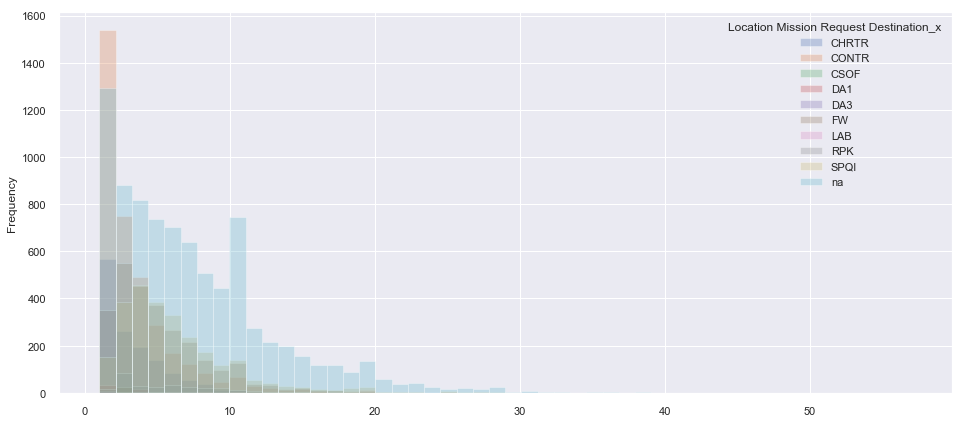

In [33]:
f_test.plot(kind='hist',alpha=0.3,bins=50,figsize=(16,7))

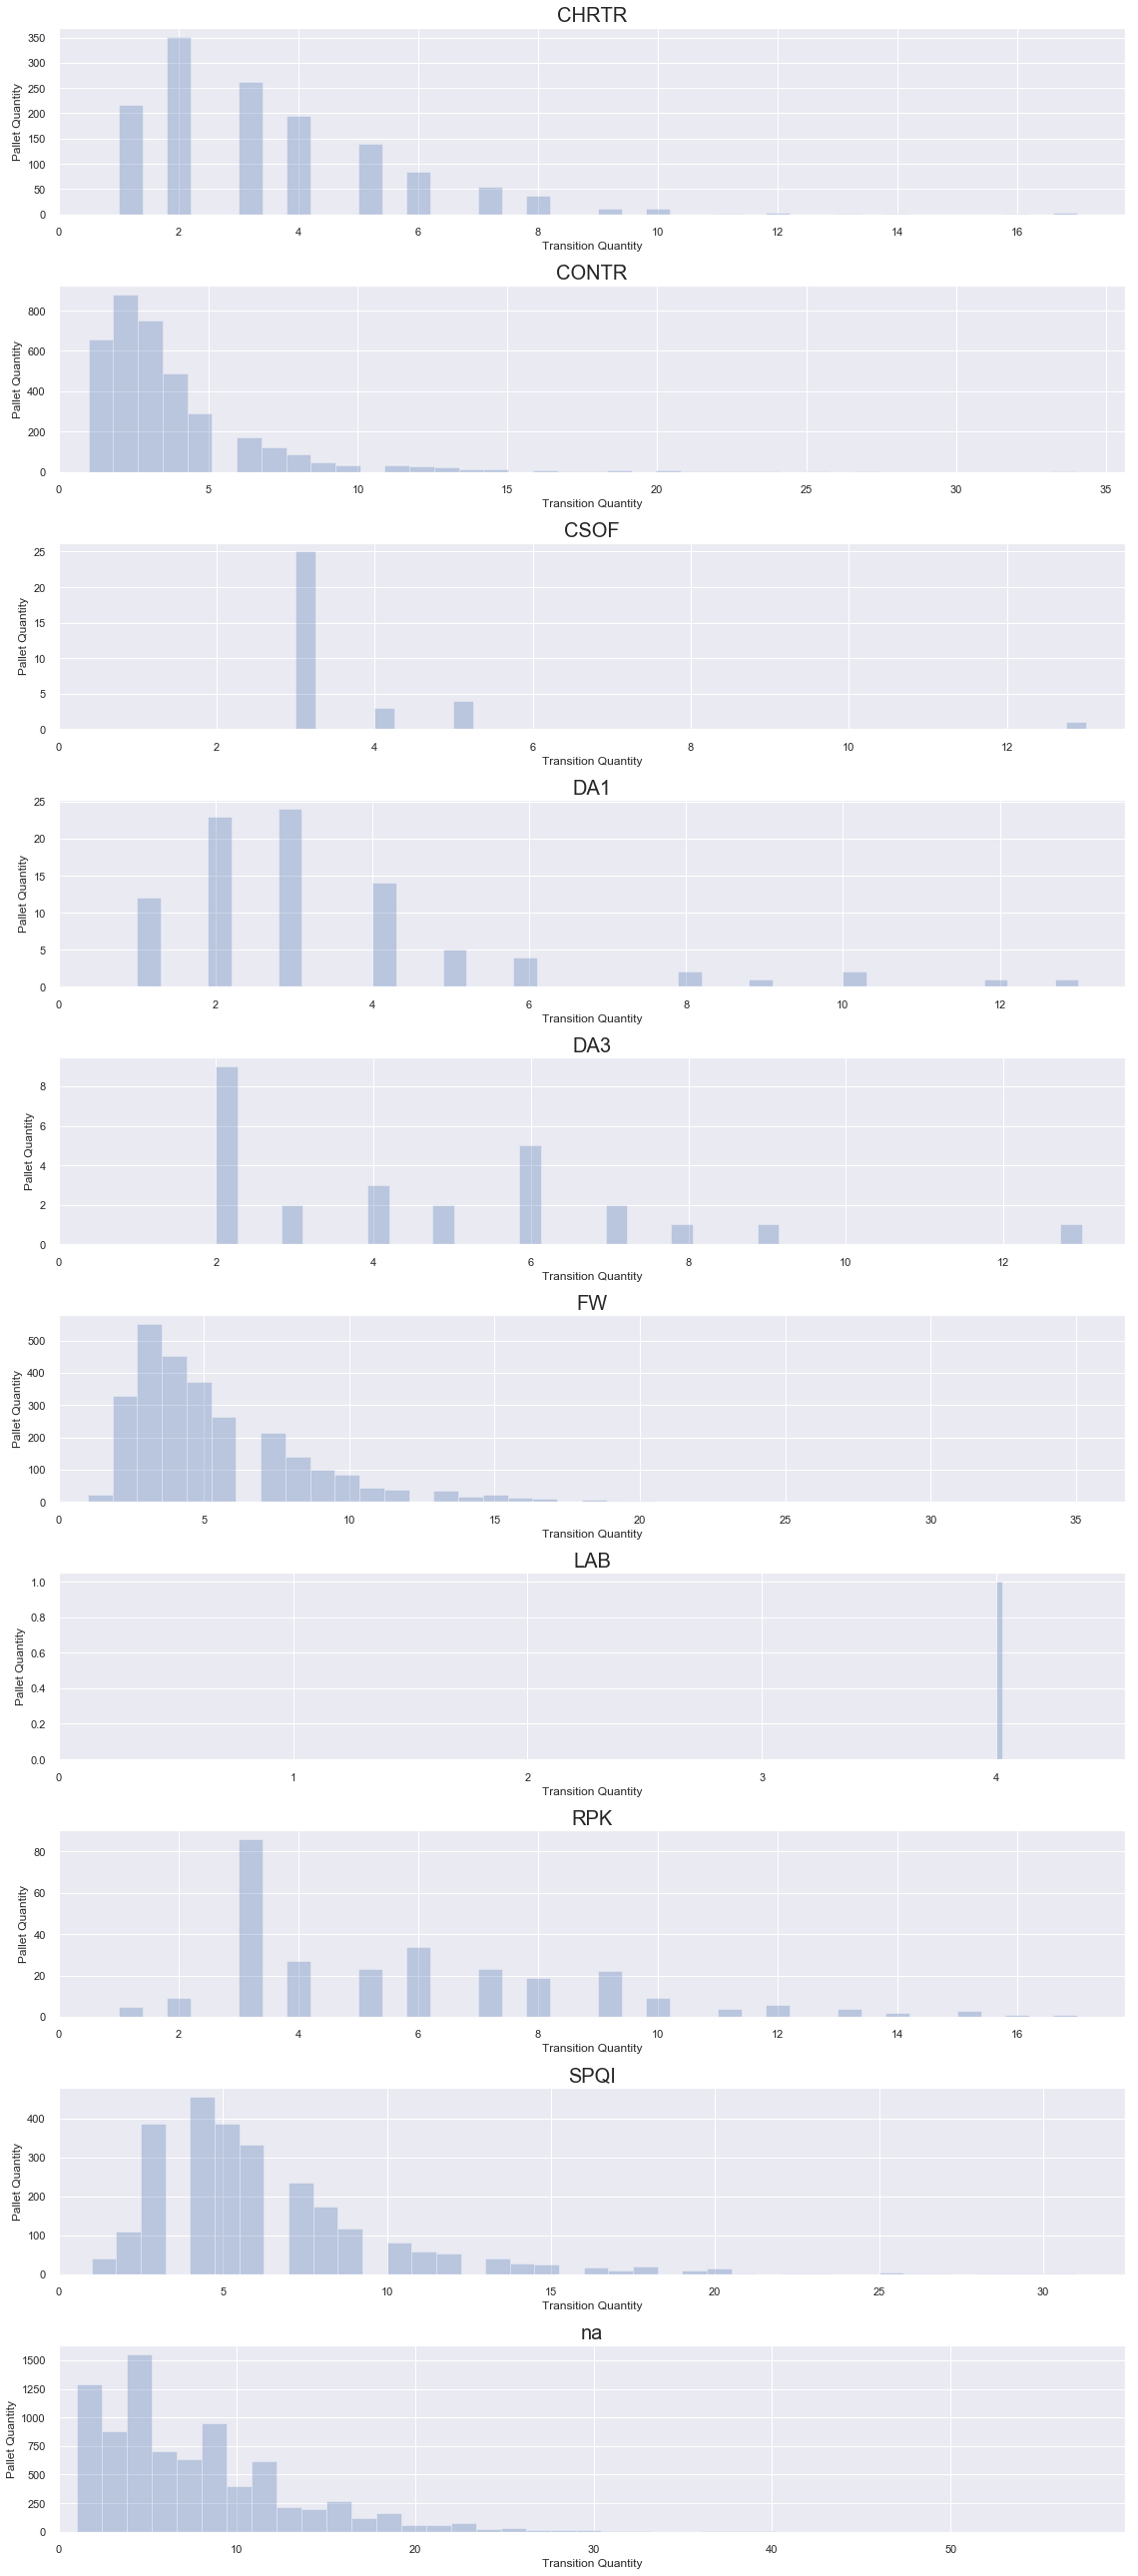

In [34]:
plt.figure(figsize=(16,36))
for idx,dest in enumerate(f_test.columns):
    plt.subplot(len(f_test.columns),1,idx+1)
    f_test[dest].plot(kind='hist',alpha=0.3,bins=40)
    plt.title(dest,fontsize=20)
    plt.xlabel('Transition Quantity')
    plt.ylabel('Pallet Quantity')
    left, right = plt.xlim()
    plt.xlim(0,right)
plt.tight_layout()

## What is the Mission Request Destination of transaction everyday?
- not the same with --> How many transaction in each department everyday?

In [35]:
test=merge_dispatch.groupby('Location Mission Request Destination_x')['Pallet Number'].resample('D').count().reset_index()

In [36]:
test['Location Mission Request Destination_x'].value_counts()

RPK      30
SPQI     30
na       30
FW       30
CHRTR    22
CONTR    22
DA3      17
DA1       3
CSOF      2
LAB       1
Name: Location Mission Request Destination_x, dtype: int64

In [37]:
#test[test['Location Mission Request Destination_x']=='RPK']
#test[test['Location Mission Request Destination_x']=='FW']
#test[test['Location Mission Request Destination_x']=='SPQI']

In [38]:
formatted_test=test.pivot(index='Transaction Date Time',columns='Location Mission Request Destination_x',values='Pallet Number')

In [39]:
# change index from 2019-7-01 00:00:00 to date only
formatted_test.reset_index(inplace=True)
formatted_test['Transaction Date Time']=formatted_test['Transaction Date Time'].dt.date
formatted_test.set_index('Transaction Date Time',inplace=True)

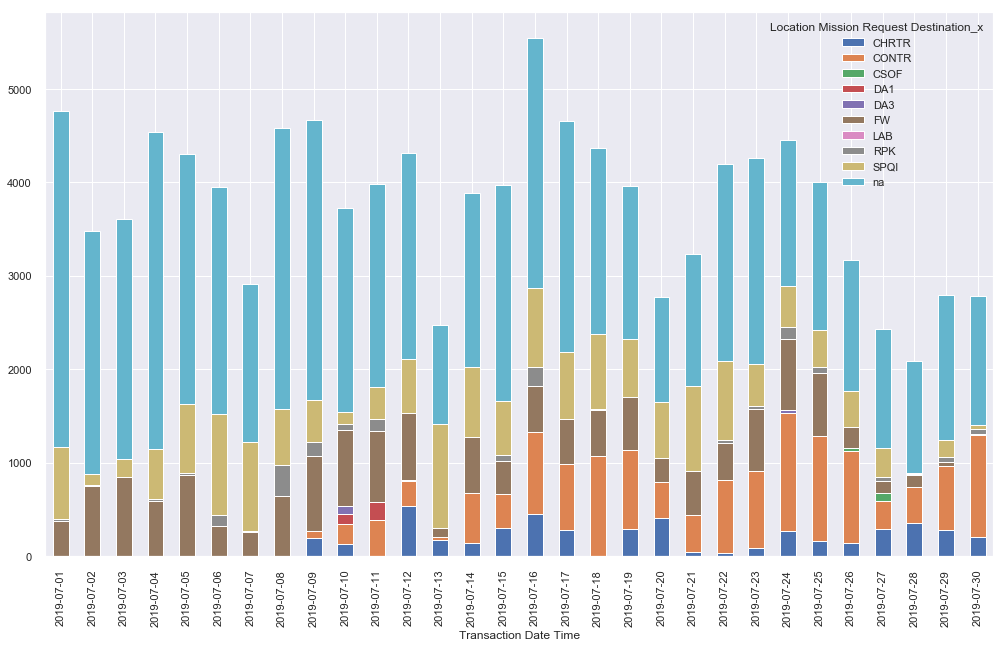

In [40]:
formatted_test.plot(kind='bar',stacked=True,figsize=(17,10))

## For each pallet, when is the last transaction in each Process

In [41]:
#checking following result
#merge_dispatch[merge_dispatch['Pallet Number']==53188675][['Previous Value','New Value','Loadout Date','Location Mission Request Destination_x']]

In [42]:
test=merge_dispatch.reset_index()
test=test.groupby(['Pallet Number','Location Mission Request Destination_x'])['Transaction Date Time','Previous Value','New Value','Loadout Date'].last()
test.head(10)

Transaction Date Time  \
Pallet Number Location Mission Request Destination_x                         
53184912      na                                       2019-07-01 11:35:09   
53188453      na                                       2019-07-08 11:22:48   
53188507      na                                       2019-07-01 08:07:40   
53188606      CHRTR                                    2019-07-28 22:50:52   
              RPK                                      2019-07-27 17:14:19   
              na                                       2019-07-27 20:25:16   
53188613      CHRTR                                    2019-07-29 01:11:44   
              FW                                       2019-07-03 14:04:30   
              RPK                                      2019-07-27 17:19:45   
              na                                       2019-07-30 13:50:21   

                                                     Previous Value  \
Pallet Number Location Mission Request Destination_x                  
53184912      na                                         Q03-04-8-1   
53188453      na                                                LO2   
53188507      na                                         Q06-12-9-1   
53188606      CHRTR                                     Q27-06-11-1   
              RPK                                           UNKNOWN   
              na                                         Q27-18-4-1   
53188613      CHRTR                                      Q27-06-9-1   
              FW                                          Q02-A-1-1   
              RPK                                           UNKNOWN   
              na                                              CHRTR   

                                                        New Value  \
Pallet Number Location Mission Request Destination_x                
53184912      na                                            CONTR   
53188453      na                                          UNKNOWN   
53188507      na                                            CONTR   
53188606      CHRTR                                   Q27-14-10-1   
              RPK                                             RPK   
              na                                      Q27-06-11-2   
53188613      CHRTR                                   Q27-06-10-1   
              FW                                       Q05-14-4-1   
              RPK                                             RPK   
              na                                          UNKNOWN   

                                                             Loadout Date  
Pallet Number Location Mission Request Destination_x                       
53184912      na                                      2019-07-01 12:30:00  
53188453      na                                      2019-06-13 13:00:00  
53188507      na                                      2019-07-01 09:15:00  
53188606      CHRTR                                   2019-07-31 07:00:00  
              RPK                                     2019-07-31 07:00:00  
              na                                      2019-07-31 07:00:00  
53188613      CHRTR                                   2019-07-30 14:00:00  
              FW                                      2019-07-30 14:00:00  
              RPK                                     2019-07-30 14:00:00  
              na                                      2019-07-30 14:00:00

## For each pallet, what is the first and last transaction in each Process

In [43]:
test=merge_dispatch.reset_index()
test_first=test.groupby(['Pallet Number','Location Mission Request Destination_x'])['Transaction Date Time','Previous Value','New Value'].first()
test_last=test.groupby(['Pallet Number','Location Mission Request Destination_x'])['Transaction Date Time','Previous Value','New Value'].last()

In [44]:
test_first.head()

Transaction Date Time  \
Pallet Number Location Mission Request Destination_x                         
53184912      na                                       2019-07-01 11:35:09   
53188453      na                                       2019-07-08 11:22:48   
53188507      na                                       2019-07-01 08:07:40   
53188606      CHRTR                                    2019-07-28 22:50:19   
              RPK                                      2019-07-24 23:56:32   

                                                     Previous Value  \
Pallet Number Location Mission Request Destination_x                  
53184912      na                                         Q03-04-8-1   
53188453      na                                                LO2   
53188507      na                                         Q06-12-9-1   
53188606      CHRTR                                     Q27-06-11-2   
              RPK                                        Q18-12-1-1   

                                                        New Value  
Pallet Number Location Mission Request Destination_x               
53184912      na                                            CONTR  
53188453      na                                          UNKNOWN  
53188507      na                                            CONTR  
53188606      CHRTR                                   Q27-06-11-1  
              RPK                                       Q16-A-8-1

In [45]:
#test_first=test_first.reset_index(level='Location Mission Request Destination_x',col_level=1)
#test_last=test_last.reset_index(level='Location Mission Request Destination_x')

In [46]:
test_first.head()

Transaction Date Time  \
Pallet Number Location Mission Request Destination_x                         
53184912      na                                       2019-07-01 11:35:09   
53188453      na                                       2019-07-08 11:22:48   
53188507      na                                       2019-07-01 08:07:40   
53188606      CHRTR                                    2019-07-28 22:50:19   
              RPK                                      2019-07-24 23:56:32   

                                                     Previous Value  \
Pallet Number Location Mission Request Destination_x                  
53184912      na                                         Q03-04-8-1   
53188453      na                                                LO2   
53188507      na                                         Q06-12-9-1   
53188606      CHRTR                                     Q27-06-11-2   
              RPK                                        Q18-12-1-1   

                                                        New Value  
Pallet Number Location Mission Request Destination_x               
53184912      na                                            CONTR  
53188453      na                                          UNKNOWN  
53188507      na                                            CONTR  
53188606      CHRTR                                   Q27-06-11-1  
              RPK                                       Q16-A-8-1

In [47]:
test_last.head()

Transaction Date Time  \
Pallet Number Location Mission Request Destination_x                         
53184912      na                                       2019-07-01 11:35:09   
53188453      na                                       2019-07-08 11:22:48   
53188507      na                                       2019-07-01 08:07:40   
53188606      CHRTR                                    2019-07-28 22:50:52   
              RPK                                      2019-07-27 17:14:19   

                                                     Previous Value  \
Pallet Number Location Mission Request Destination_x                  
53184912      na                                         Q03-04-8-1   
53188453      na                                                LO2   
53188507      na                                         Q06-12-9-1   
53188606      CHRTR                                     Q27-06-11-1   
              RPK                                           UNKNOWN   

                                                        New Value  
Pallet Number Location Mission Request Destination_x               
53184912      na                                            CONTR  
53188453      na                                          UNKNOWN  
53188507      na                                            CONTR  
53188606      CHRTR                                   Q27-14-10-1  
              RPK                                             RPK

In [48]:
test_merge=test_first.merge(test_last,on=test_first.index,suffixes=('_first', '_last'))

In [49]:
test_merge.head()

key_0 Transaction Date Time_first Previous Value_first  \
0     (53184912, na)         2019-07-01 11:35:09           Q03-04-8-1   
1     (53188453, na)         2019-07-08 11:22:48                  LO2   
2     (53188507, na)         2019-07-01 08:07:40           Q06-12-9-1   
3  (53188606, CHRTR)         2019-07-28 22:50:19          Q27-06-11-2   
4    (53188606, RPK)         2019-07-24 23:56:32           Q18-12-1-1   

  New Value_first Transaction Date Time_last Previous Value_last  \
0           CONTR        2019-07-01 11:35:09          Q03-04-8-1   
1         UNKNOWN        2019-07-08 11:22:48                 LO2   
2           CONTR        2019-07-01 08:07:40          Q06-12-9-1   
3     Q27-06-11-1        2019-07-28 22:50:52         Q27-06-11-1   
4       Q16-A-8-1        2019-07-27 17:14:19             UNKNOWN   

  New Value_last  
0          CONTR  
1        UNKNOWN  
2          CONTR  
3    Q27-14-10-1  
4            RPK

## For each pallet, what is the duration in each process

In [50]:
test_merge['Transaction_duration_per_process']=test_merge['Transaction Date Time_last']-test_merge['Transaction Date Time_first']

In [51]:
test_merge['duration_per_process_sec']=test_merge['Transaction_duration_per_process'].astype('timedelta64[s]')

In [52]:
test_merge.sample(10)

key_0 Transaction Date Time_first Previous Value_first  \
12947     (59687141, FW)         2019-07-27 23:37:37           Q05-05-2-1   
7286    (57419928, SPQI)         2019-07-01 12:28:32           Q05-08-7-2   
5679      (57402760, FW)         2019-07-03 02:17:57           Q27-07-6-2   
7611      (57423666, na)         2019-07-04 09:15:04         ZD04-08-10-1   
4533      (57376771, FW)         2019-07-03 09:59:32           Q05-17-3-2   
6732   (57415067, CONTR)         2019-07-24 11:52:09           Q06-17-3-1   
10879     (59440470, FW)         2019-07-11 00:58:50           Q23-19-6-1   
3829    (57365003, SPQI)         2019-07-04 09:37:36           Q18-04-9-2   
6894    (57417023, SPQI)         2019-07-07 03:40:10           Q29-20-1-1   
16494     (59750265, na)         2019-07-14 18:11:22              UNKNOWN   

      New Value_first Transaction Date Time_last Previous Value_last  \
12947      Q05-05-2-2        2019-07-28 12:47:51             UNKNOWN   
7286          UNKNOWN        2019-07-09 09:45:36             UNKNOWN   
5679       Q27-06-3-1        2019-07-05 11:13:38             UNKNOWN   
7611          UNKNOWN        2019-07-10 14:45:06         Q06-21-12-1   
4533        Q04-A-3-1        2019-07-03 10:00:07             UNKNOWN   
6732       Q06-14-9-2        2019-07-25 14:31:19          Q09-10-6-1   
10879      Q05-18-3-2        2019-07-11 15:38:52             UNKNOWN   
3829          UNKNOWN        2019-07-04 09:37:41             UNKNOWN   
6894       Q29-20-2-1        2019-07-08 08:15:30             UNKNOWN   
16494         UNKNOWN        2019-07-16 07:57:09               CHRTR   

      New Value_last Transaction_duration_per_process  \
12947             FW                  0 days 13:10:14   
7286            SPQI                  7 days 21:17:04   
5679              FW                  2 days 08:55:41   
7611      Q06-20-4-2                  6 days 05:30:02   
4533              FW                  0 days 00:00:35   
6732           CONTR                  1 days 02:39:10   
10879             FW                  0 days 14:40:02   
3829            SPQI                  0 days 00:00:05   
6894            SPQI                  1 days 04:35:20   
16494        UNKNOWN                  1 days 13:45:47   

       duration_per_process_sec  
12947                   47414.0  
7286                   681424.0  
5679                   204941.0  
7611                   538202.0  
4533                       35.0  
6732                    95950.0  
10879                   52802.0  
3829                        5.0  
6894                   102920.0  
16494                  135947.0

## What is the distribution of duration_per_process

In [53]:
test_duration=test_merge[['key_0','duration_per_process_sec']]
test_duration.head()

key_0  duration_per_process_sec
0     (53184912, na)                       0.0
1     (53188453, na)                       0.0
2     (53188507, na)                       0.0
3  (53188606, CHRTR)                      33.0
4    (53188606, RPK)                  235067.0

In [54]:
for idx,col in enumerate(['Pallet Number','Location Mission Request Destination_x']):
    test_duration[col]=test_duration['key_0'].apply(lambda x:x[idx])

C:\Users\Nan\AppData\Local\conda\conda\envs\env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [55]:
test_duration.drop(columns='key_0',axis='columns',inplace=True)
test_duration.head()

C:\Users\Nan\AppData\Local\conda\conda\envs\env\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


duration_per_process_sec  Pallet Number  \
0                       0.0       53184912   
1                       0.0       53188453   
2                       0.0       53188507   
3                      33.0       53188606   
4                  235067.0       53188606   

  Location Mission Request Destination_x  
0                                     na  
1                                     na  
2                                     na  
3                                  CHRTR  
4                                    RPK

In [56]:
test_duration['duration_per_process_sec']=test_duration['duration_per_process_sec']/(60*60*24)

C:\Users\Nan\AppData\Local\conda\conda\envs\env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


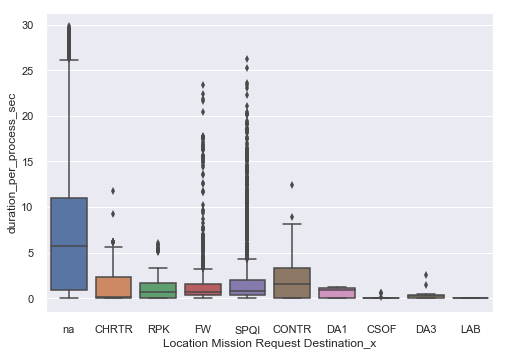

In [57]:
sns.boxplot(data=test_duration,x='Location Mission Request Destination_x',y='duration_per_process_sec')

In [58]:
pv_test_duration=pd.pivot(data=test_duration,index='Pallet Number',columns='Location Mission Request Destination_x')

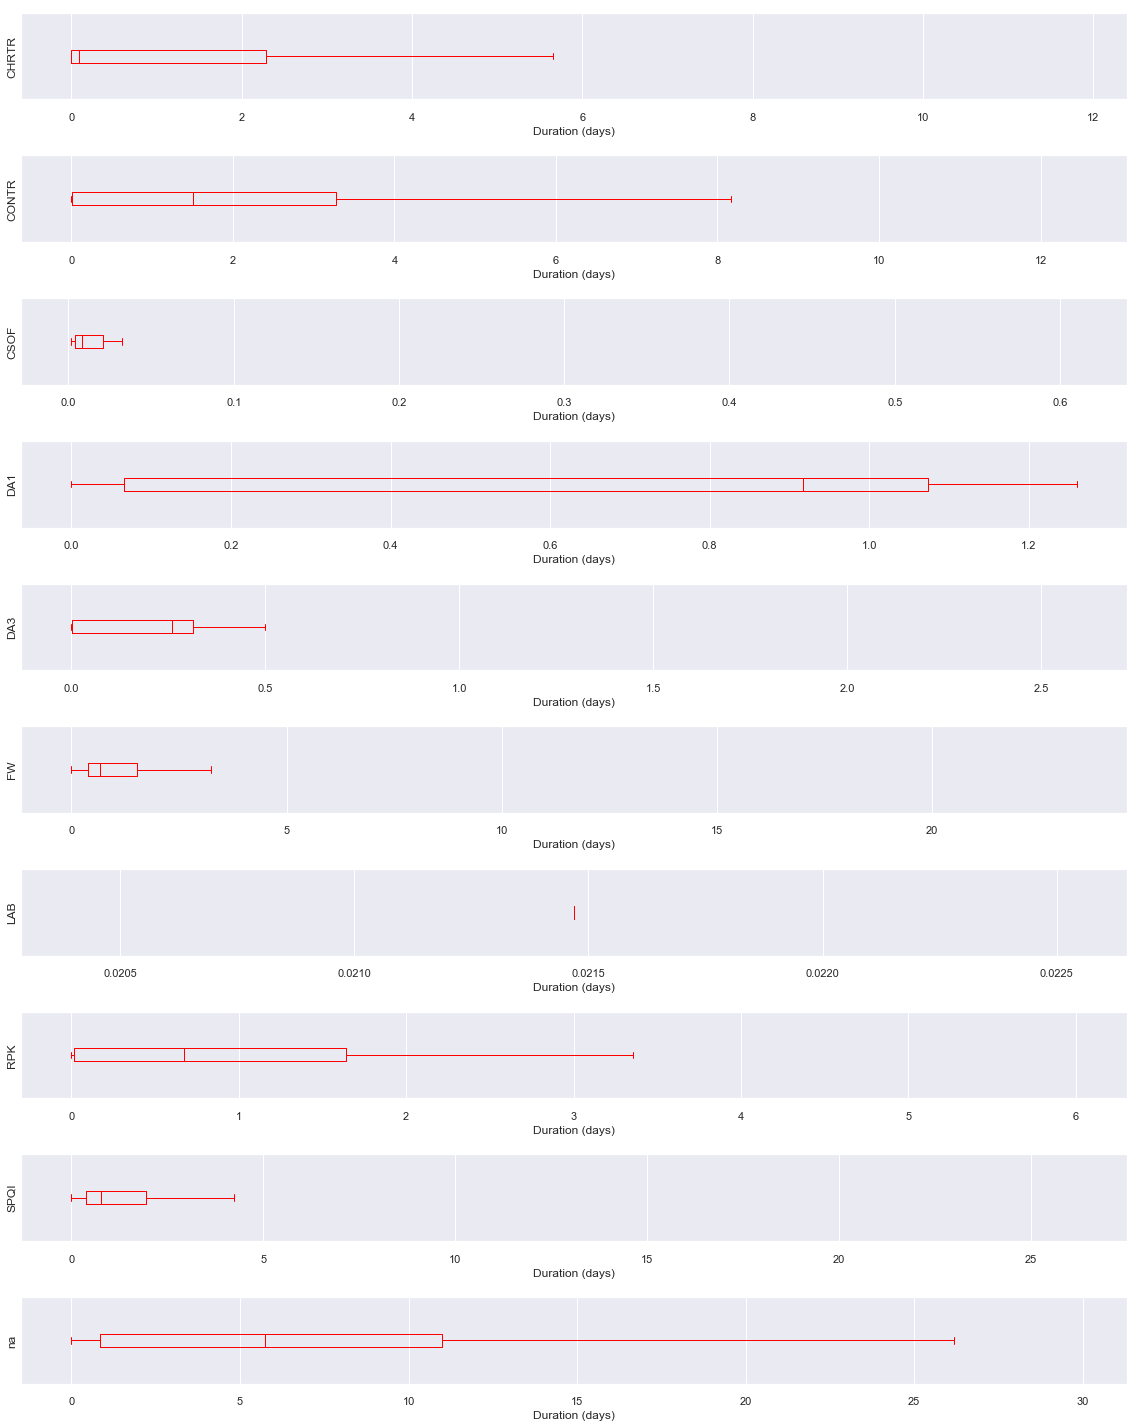

In [59]:
plt.figure(figsize=(16,20))
for idx,c in enumerate(pv_test_duration.columns):
    plt.subplot(len(pv_test_duration.columns),1,idx+1)

    pv_test_duration[c].plot(kind='box',vert=0,color='red')
    locs, labels = plt.yticks()
    #plt.yticks(np.arange(0, 2500000, step=500000),np.arange(0, 2.5, step=0.5))

    plt.xticks()
    plt.yticks([])
    plt.ylabel(c[1])
    plt.xlabel('Duration (days)')
plt.tight_layout()

## What is the transaction history of the pallet sorted according to pallet number

In [59]:
pallet=merge_dispatch['Pallet Number']

In [60]:
#pallet.last('M')

## What is the last position of each pallet in transaction data

In [61]:
test=merge_dispatch.reset_index()
test=test.groupby('Pallet Number')['Transaction Date Time','Previous Value','New Value','Loadout Date'].last()
test.head()

Transaction Date Time Previous Value    New Value  \
Pallet Number                                                     
53184912        2019-07-01 11:35:09     Q03-04-8-1        CONTR   
53188453        2019-07-08 11:22:48            LO2      UNKNOWN   
53188507        2019-07-01 08:07:40     Q06-12-9-1        CONTR   
53188606        2019-07-28 22:50:52    Q27-06-11-1  Q27-14-10-1   
53188613        2019-07-30 13:50:21          CHRTR      UNKNOWN   

                      Loadout Date  
Pallet Number                       
53184912       2019-07-01 12:30:00  
53188453       2019-06-13 13:00:00  
53188507       2019-07-01 09:15:00  
53188606       2019-07-31 07:00:00  
53188613       2019-07-30 14:00:00

In [62]:
test.loc[53188620]

Transaction Date Time    2019-07-30 14:34:18
Previous Value                    Q04-14-9-1
New Value                         Q04-21-8-2
Loadout Date             2019-08-05 10:00:00
Name: 53188620, dtype: object

In [216]:
# checking
#merge_dispatch.loc[merge_dispatch['Pallet Number']==53191163,['Pallet Number','Location Mission Request Destination_x','Previous Value','New Value']]

## What is the pallet took away in each position

In [114]:
test=merge_dispatch.reset_index()
df_prev=test.groupby(['Transaction Date Time','Previous Value','Pallet Number'])['Pallet Number'].count()

In [115]:
df_prev.head()

Transaction Date Time  Previous Value  Pallet Number
2019-07-01 00:00:10    Q02-03-3-1      59717008         1
2019-07-01 00:00:29    Q14-02-7-1      59699489         1
2019-07-01 00:00:39    ALLO            59669482         1
2019-07-01 00:00:44    Q02-03-4-1      59717008         1
2019-07-01 00:01:03    Q02-03-2-2      59718630         1
Name: Pallet Number, dtype: int64

In [118]:
df_prev=df_prev.unstack(level=1)

In [119]:
df_prev.head()

Previous Value                       ALLO  CA01  CA02  CA03  CA05  CA06  CA09  \
Transaction Date Time Pallet Number                                             
2019-07-01 00:00:10   59717008        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:00:29   59699489        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:00:39   59669482        1.0   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:00:44   59717008        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:01:03   59718630        NaN   NaN   NaN   NaN   NaN   NaN   NaN   

Previous Value                       CA10  CA11  CA16  CA17  CA18  CCB  CHRTR  \
Transaction Date Time Pallet Number                                             
2019-07-01 00:00:10   59717008        NaN   NaN   NaN   NaN   NaN  NaN    NaN   
2019-07-01 00:00:29   59699489        NaN   NaN   NaN   NaN   NaN  NaN    NaN   
2019-07-01 00:00:39   59669482        NaN   NaN   NaN   NaN   NaN  NaN    NaN   
2019-07-01 00:00:44   59717008        NaN   NaN   NaN   NaN   NaN  NaN    NaN   
2019-07-01 00:01:03   59718630        NaN   NaN   NaN   NaN   NaN  NaN    NaN   

Previous Value                       CONTR  CSOF  DA1  DA2  DA3  FW  H51  H52  \
Transaction Date Time Pallet Number                                             
2019-07-01 00:00:10   59717008         NaN   NaN  NaN  NaN  NaN NaN  NaN  NaN   
2019-07-01 00:00:29   59699489         NaN   NaN  NaN  NaN  NaN NaN  NaN  NaN   
2019-07-01 00:00:39   59669482         NaN   NaN  NaN  NaN  NaN NaN  NaN  NaN   
2019-07-01 00:00:44   59717008         NaN   NaN  NaN  NaN  NaN NaN  NaN  NaN   
2019-07-01 00:01:03   59718630         NaN   NaN  NaN  NaN  NaN NaN  NaN  NaN   

Previous Value                       LAB  LO1  LO2  LOST  MIDCNPY  MISS  \
Transaction Date Time Pallet Number                                       
2019-07-01 00:00:10   59717008       NaN  NaN  NaN   NaN      NaN   NaN   
2019-07-01 00:00:29   59699489       NaN  NaN  NaN   NaN      NaN   NaN   
2019-07-01 00:00:39   59669482       NaN  NaN  NaN   NaN      NaN   NaN   
2019-07-01 00:00:44   59717008       NaN  NaN  NaN   NaN      NaN   NaN   
2019-07-01 00:01:03   59718630       NaN  NaN  NaN   NaN      NaN   NaN   

Previous Value                       P01-05-4-2  P01-09-6-1  P01-11-3-1  \
Transaction Date Time Pallet Number                                       
2019-07-01 00:00:10   59717008              NaN         NaN         NaN   
2019-07-01 00:00:29   59699489              NaN         NaN         NaN   
2019-07-01 00:00:39   59669482              NaN         NaN         NaN   
2019-07-01 00:00:44   59717008              NaN         NaN         NaN   
2019-07-01 00:01:03   59718630              NaN         NaN         NaN   

Previous Value                       P01-11-8-1  P01-12-3-2  P01-12-8-1  \
Transaction Date Time Pallet Number                                       
2019-07-01 00:00:10   59717008              NaN         NaN         NaN   
2019-07-01 00:00:29   59699489              NaN         NaN         NaN   
2019-07-01 00:00:39   59669482              NaN         NaN         NaN   
2019-07-01 00:00:44   59717008              NaN         NaN         NaN   
2019-07-01 00:01:03   59718630              NaN         NaN         NaN   

Previous Value                       P01-12-8-2  P01-13-1-1  P01-13-2-1  \
Transaction Date Time Pallet Number                                       
2019-07-01 00:00:10   59717008              NaN         NaN         NaN   
2019-07-01 00:00:29   59699489              NaN         NaN         NaN   
2019-07-01 00:00:39   59669482              NaN         NaN         NaN   
2019-07-01 00:00:44   59717008              NaN         NaN         NaN   
2019-07-01 00:01:03   59718630              NaN         NaN         NaN   

Previous Value                       P01-13-3-1  P01-13-8-1  P01-14-2-1  \
Transaction Date Time Pallet Number                                       
2019-07-01 00:00:10   59717008            

In [213]:
df_prev.shape

(113853, 14502)

## What is the pallet took away in every room or row

In [255]:
extrc_row=extract_room_row(df_position,'Position')

In [256]:
df_prev_new=pd.DataFrame()

In [257]:
for idx,c in enumerate(extrc_row):
    column_list=[l for l in df_prev.columns if extrc_row[idx] in l]
    if len(column_list)==1:
        df_prev_new[column_list]=df_prev[column_list]
    elif len(column_list)>1:
        total=df_prev[column_list].sum(axis='columns')
        df_prev_new[c]=total

    

In [258]:
df_prev_new

ALLO  CA01  CA02  CA03  CA05  CA06  CA09  \
Transaction Date Time Pallet Number                                             
2019-07-01 00:00:10   59717008        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:00:29   59699489        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:00:39   59669482        1.0   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:00:44   59717008        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:01:03   59718630        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:01:10   59699489        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:01:15   59444423        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:01:16   59682054        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:01:20   59685451        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:01:22   59699489        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:01:26   59699489        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:01:28   59685451        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:01:35   59669482        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
                      59718630        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:01:36   57421891        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:01:56   59699489        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:02:20   59431225        1.0   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:02:51   59698529        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:03:23   59700178        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:04:04   59431225        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:04:49   59685451        1.0   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:05:28   59713321        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:05:39   59708952        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:05:40   59685451        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:05:46   59443235        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:06:10   59708952        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:06:46   59175006        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:06:47   59175006        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:06:48   59175006        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:06:57   59175006        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...                                   ...   ...   ...   ...   ...   ...   ...   
2019-07-30 23:46:49   59680920        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-30 23:46:51   59327399        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-30 23:47:06   59717725        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-30 23:47:30   59429123        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-30 23:47:54   59680487        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-30 23:49:16   59327818        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-30 23:49:22   59431904        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-30 23:49:28   59668454        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-30 23:50:22   59432154        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-30 23:50:36   59698598        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-30 23:51:06   59701762        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-30 23:51:31   59439566        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-30 23:51:41   59432154        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-30 23:52:02   58513076        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-30 23:52:37   59701762        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-30 23:53:18   59758186        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-30 23:53:29   59435636        NaN   NaN   NaN   NaN   NaN   

In [262]:
df_prev_new.reset_index(level=1,drop=True)

ALLO  CA01  CA02  CA03  CA05  CA06  CA09  CA10  CA11  \
Transaction Date Time                                                         
2019-07-01 00:00:10     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:00:29     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:00:39     1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:00:44     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:01:03     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:01:10     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:01:15     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:01:16     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:01:20     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:01:22     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:01:26     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:01:28     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:01:35     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:01:35     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:01:36     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:01:56     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:02:20     1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:02:51     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:03:23     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:04:04     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:04:49     1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:05:28     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:05:39     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:05:40     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:05:46     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:06:10     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:06:46     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:06:47     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:06:48     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-01 00:06:57     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...                     ...   ...   ...   ...   ...   ...   ...   ...   ...   
2019-07-30 23:46:49     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-30 23:46:51     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-30 23:47:06     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-30 23:47:30     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-30 23:47:54     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-30 23:49:16     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-30 23:49:22     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-30 23:49:28     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-30 23:50:22     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-30 23:50:36     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-30 23:51:06     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-30 23:51:31     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-30 23:51:41     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-30 23:52:02     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-30 23:52:37     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-30 23:53:18     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-30 23:53:29     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-07-30 23:53:58     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   N

In [265]:
df_prev.reset_index(level=1,drop=True,inplace=True)

In [266]:
df_prev.loc['2019-07-01 00:00:00',[l for l in df_prev.columns if 'Q06-03' in l]].sum().sum()

KeyError: '2019-07-01 00:00:00'

In [267]:
# this is how to extract info about pallet moving
df_prev.loc['2019-07-01 00:00:00':'2019-07-01 10:09:35',['Q02-03-2-1','Q02-03-4-1']].sum().sum()

2.0

In [269]:
df_prev.loc['2019-07-14 20:00:39':'2019-07-18 00:00:39',[l for l in df_prev.columns if 'Q06-03' in l]].sum().sum()

32.0

In [330]:
t=merge_dispatch.iloc[0:10]
t.head(3)

Customer Label Code Dry Matter Code  Fruit  \
Transaction Date Time                                              
2019-07-01 00:00:10                     N               Y  13000   
2019-07-01 00:00:44                     N               Y  13000   
2019-07-03 22:41:27                     N               Y  13000   

                       Fruit Per Pack Fruit Size Code Growing Method  \
Transaction Date Time                                                  
2019-07-01 00:00:10               130              42             CK   
2019-07-01 00:00:44               130              42             CK   
2019-07-03 22:41:27               130              42             CK   

                      Japan Sub Brand Code Labelling Indicator Code  \
Transaction Date Time                                                 
2019-07-01 00:00:10                      N                       LG   
2019-07-01 00:00:44                      N                       LG   
2019-07-03 22:41:27                      N                       LG   

                      Location Column_x Location Height_x  \
Transaction Date Time                                       
2019-07-01 00:00:10                  na                 0   
2019-07-01 00:00:44                  na                 0   
2019-07-03 22:41:27                  na                 0   

                      Location Room Code_x Location Row Code_x  \
Transaction Date Time                                            
2019-07-01 00:00:10                UNKNOWN                  na   
2019-07-01 00:00:44                UNKNOWN                  na   
2019-07-03 22:41:27                UNKNOWN                  na   

                       Location Request Number_x  \
Transaction Date Time                              
2019-07-01 00:00:10                            0   
2019-07-01 00:00:44                            0   
2019-07-03 22:41:27                            0   

                      Location Mission Request Destination_x Marketer  \
Transaction Date Time                                                   
2019-07-01 00:00:10                                       na      ZIL   
2019-07-01 00:00:44                                       na      ZIL   
2019-07-03 22:41:27                                       na      ZIL   

                      Material Number   New Value           Ok Until Date  \
Transaction Date Time                                                       
2019-07-01 00:00:10             62853  Q02-03-4-1  21/07/2019 12:00:00 AM   
2019-07-01 00:00:44             62853  Q02-16-6-2  21/07/2019 12:00:00 AM   
2019-07-03 22:41:27             62853  Q02-15-6-2  21/07/2019 12:00:00 AM   

                       Pack Code_x              Pack Date  Packed Fruit  \
Transaction Date Time                                                     
2019-07-01 00:00:10          41236  6/06/2019 12:00:00 AM         13000   
2019-07-01 00:00:44          41236  6/06/2019 12:00:00 AM         13000   
2019-07-03 22:41:27          41236  6/06/2019 12:00:00 AM         13000   

                      Packhouse Code Pack Indicator Code Pack Label Code  \
Transaction Date Time                                                      
2019-07-01 00:00:10             3TPP                   N               N   
2019-07-01 00:00:44             3TPP                   N               N   
2019-07-03 22:41:27             3TPP                   N               N   

                      Pack Make  Packs Pack Type  Pallet Number  \
Transaction Date Time                                             
2019-07-01 00:00:10         KC1    100   ENMBKC1       59717008   
2019-07-01 00:00:44         KC1    100   ENMBKC1       59717008   
2019-07-03 22:41:27         KC1    100   ENMBKC1       59717008   

                       Pallet Rework Count  Plant Code Previous Value  \
Transaction Date Time                                                   
2019-07-01 00:00:10                      0        1103     Q02-03-3-1   
20

In [342]:
g=[]
for idx,(x,y,z) in enumerate(t[['Transaction Date_prv_2hr','Transaction Date','Previous Value_Row']].values):
    print(x,y,z,idx)
    g.append(df_prev.loc[x:y,[l for l in df_prev.columns if z in l]].sum().sum())

2019-06-30 22:00:10 2019-07-01 00:00:10 Q02-03 0
2019-06-30 22:00:44 2019-07-01 00:00:44 Q02-03 1
2019-07-03 20:41:27 2019-07-03 22:41:27 Q02-16 2
2019-07-06 17:53:50 2019-07-06 19:53:50 Q02-15 3
2019-07-06 17:54:42 2019-07-06 19:54:42 Q02-15 4
2019-07-06 17:54:49 2019-07-06 19:54:49 Q02-13 5
2019-07-06 20:57:10 2019-07-06 22:57:10 Q02-13 6
2019-07-10 23:31:31 2019-07-11 01:31:31 Q02-07 7
2019-07-13 19:20:13 2019-07-13 21:20:13 Q02-05 8
2019-07-13 19:20:17 2019-07-13 21:20:17 UNKNOWN 9


In [343]:
g

[1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 3.0, 9.0, 31.0]

In [325]:
x='2019-06-30 22:00:10'
#y='7/07/2019 12:00:10 AM'
y='2019-07-01 22:00:10'
z='Q02-03'
df_prev.loc[x:y,[l for l in df_prev.columns if z in l]].sum().sum()

6.0

In [293]:
result

2.0

In [241]:
merge_dispatch['Transaction Date_prv_2hr']=merge_dispatch.index+datetime.timedelta(hours = -2)

In [271]:
merge_dispatch['Previous Value_Row']=merge_dispatch['Previous Value'].apply(lambda x :x.split('-')[0]+'-'+x.split('-')[1] if '-' in x else x)

In [328]:
merge_dispatch['Transaction Date']=pd.to_datetime(merge_dispatch['Transaction Date'],format='%d/%m/%Y %I:%M:%S %p')

In [272]:
merge_dispatch[merge_dispatch['Pallet Number']==59669482][['Previous Value','Transaction Date','Previous Value_Row']]

Previous Value        Transaction Date  \
Transaction Date Time                                          
2019-07-01 00:00:39             ALLO   1/07/2019 12:00:39 AM   
2019-07-01 00:01:35          UNKNOWN   1/07/2019 12:01:35 AM   
2019-07-05 11:46:33       Q08-15-5-1   5/07/2019 11:46:33 AM   
2019-07-05 11:48:59          UNKNOWN   5/07/2019 11:48:59 AM   
2019-07-05 12:35:33              LAB   5/07/2019 12:35:33 PM   
2019-07-05 12:36:47          UNKNOWN   5/07/2019 12:36:47 PM   
2019-07-13 01:45:53      Q01-02-12-2   13/07/2019 1:45:53 AM   
2019-07-13 01:46:22       Q01-06-9-2   13/07/2019 1:46:22 AM   
2019-07-13 03:53:13       Q01-23-9-1   13/07/2019 3:53:13 AM   
2019-07-13 21:16:23      Q01-02-12-2   13/07/2019 9:16:23 PM   
2019-07-14 23:30:27      Q01-10-12-1  14/07/2019 11:30:27 PM   
2019-07-15 14:55:31       Q01-08-4-1   15/07/2019 2:55:31 PM   
2019-07-15 15:23:00             CSOF   15/07/2019 3:23:00 PM   
2019-07-15 15:26:37          UNKNOWN   15/07/2019 3:26:37 PM   
2019-07-15 15:27:36      Q09-22-12-1   15/07/2019 3:27:36 PM   
2019-07-15 15:28:38      Q09-24-12-1   15/07/2019 3:28:38 PM   
2019-07-16 23:12:45      Q09-22-12-2  16/07/2019 11:12:45 PM   
2019-07-16 23:16:40       Q06-13-4-1  16/07/2019 11:16:40 PM   
2019-07-16 23:17:43       Q06-13-5-1  16/07/2019 11:17:43 PM   
2019-07-17 10:45:37       Q06-13-4-2  17/07/2019 10:45:37 AM   

                      Previous Value_Row  
Transaction Date Time                     
2019-07-01 00:00:39                 ALLO  
2019-07-01 00:01:35              UNKNOWN  
2019-07-05 11:46:33               Q08-15  
2019-07-05 11:48:59              UNKNOWN  
2019-07-05 12:35:33                  LAB  
2019-07-05 12:36:47              UNKNOWN  
2019-07-13 01:45:53               Q01-02  
2019-07-13 01:46:22               Q01-06  
2019-07-13 03:53:13               Q01-23  
2019-07-13 21:16:23               Q01-02  
2019-07-14 23:30:27               Q01-10  
2019-07-15 14:55:31               Q01-08  
2019-07-15 15:23:00                 CSOF  
2019-07-15 15:26:37              UNKNOWN  
2019-07-15 15:27:36               Q09-22  
2019-07-15 15:28:38               Q09-24  
2019-07-16 23:12:45               Q09-22  
2019-07-16 23:16:40               Q06-13  
2019-07-16 23:17:43               Q06-13  
2019-07-17 10:45:37               Q06-13

In [69]:
len(merge_dispatch['Previous Value'].unique())

14502

In [70]:
len(merge_dispatch['New Value'].unique())

12302

In [78]:
df_position=pd.DataFrame(data=merge_dispatch['Previous Value'].unique(),columns=['Position'])

In [ ]:
df_position['Position'].apply(lambda c:c.split('-')[2] if '-' in c else c)

In [75]:
df_position['Position'].tolist()

['Q02-03-3-1',
 'Q02-03-4-1',
 'Q02-16-6-2',
 'Q02-15-6-2',
 'Q02-15-6-1',
 'Q02-13-10-1',
 'Q02-13-10-2',
 'Q02-07-7-1',
 'Q02-05-5-1',
 'UNKNOWN',
 'Q27-04-7-1',
 'CHRTR',
 'Q14-02-7-1',
 'Q14-02-10-1',
 'Q03-A-8-1',
 'Q03-A-3-1',
 'Q03-A-4-1',
 'Q03-22-7-1',
 'CONTR',
 'ALLO',
 'Q08-15-5-1',
 'LAB',
 'Q01-02-12-2',
 'Q01-06-9-2',
 'Q01-23-9-1',
 'Q01-10-12-1',
 'Q01-08-4-1',
 'CSOF',
 'Q09-22-12-1',
 'Q09-24-12-1',
 'Q09-22-12-2',
 'Q06-13-4-1',
 'Q06-13-5-1',
 'Q06-13-4-2',
 'Q02-03-2-2',
 'Q02-03-3-2',
 'Q02-09-12-2',
 'Q02-06-5-1',
 'Q05-02-9-1',
 'FW',
 'Q03-12-1-2',
 'Q03-08-8-2',
 'Q03-07-2-1',
 'Q03-20-11-1',
 'Q03-16-7-1',
 'Q03-16-8-1',
 'Q26-02-9-2',
 'Q25-15-13-1',
 'Q25-16-13-1',
 'Q26-01-11-2',
 'Q26-10-11-1',
 'Q08-07-6-1',
 'DA3',
 'Q27-04-6-1',
 'Q01-02-5-1',
 'Q08-15-6-1',
 'Q01-A-6-1',
 'Q01-A-7-1',
 'Q01-19-7-1',
 'Q19-06-7-1',
 'Q19-06-7-2',
 'Q19-06-8-1',
 'Q19-05-6-1',
 'Q19-04-4-1',
 'Q05-02-3-1',
 'Q03-12-2-1',
 'Q07-06-8-1',
 'Q07-19-4-2',
 'Q07-17-9-2',
 'Q